## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9527262	total: 48ms	remaining: 48s
1:	learn: 0.9321088	total: 49.1ms	remaining: 24.5s
2:	learn: 0.9121148	total: 50.4ms	remaining: 16.8s
3:	learn: 0.8954764	total: 51.5ms	remaining: 12.8s
4:	learn: 0.8787232	total: 52.6ms	remaining: 10.5s
5:	learn: 0.8618406	total: 53.6ms	remaining: 8.87s
6:	learn: 0.8446903	total: 54.6ms	remaining: 7.75s
7:	learn: 0.8279969	total: 55.5ms	remaining: 6.88s
8:	learn: 0.8121864	total: 56.4ms	remaining: 6.21s
9:	learn: 0.7949349	total: 57.4ms	remaining: 5.68s
10:	learn: 0.7800460	total: 58.6ms	remaining: 5.27s
11:	learn: 0.7645048	total: 59.6ms	remaining: 4.91s
12:	learn: 0.7495937	total: 60.6ms	remaining: 4.6s
13:	learn: 0.7351107	total: 61.6ms	remaining: 4.34s
14:	learn: 0.7225791	total: 62.6ms	remaining: 4.11s
15:	learn: 0.7079371	total: 63.5ms	remaining: 3.91s
16:	learn: 0.6958579	total: 64.6ms	remaining: 3.74s
17:	learn: 0.6828814	total: 65.6ms	remaining: 3.58s
18:	learn: 0.6705847	total: 66.6ms	remaining: 3.44

84:	learn: 0.3341122	total: 139ms	remaining: 1.49s
85:	learn: 0.3336501	total: 140ms	remaining: 1.49s
86:	learn: 0.3323652	total: 141ms	remaining: 1.48s
87:	learn: 0.3303009	total: 142ms	remaining: 1.47s
88:	learn: 0.3285877	total: 143ms	remaining: 1.46s
89:	learn: 0.3263923	total: 144ms	remaining: 1.46s
90:	learn: 0.3243860	total: 145ms	remaining: 1.45s
91:	learn: 0.3229759	total: 146ms	remaining: 1.44s
92:	learn: 0.3213409	total: 147ms	remaining: 1.43s
93:	learn: 0.3196442	total: 148ms	remaining: 1.43s
94:	learn: 0.3175407	total: 149ms	remaining: 1.42s
95:	learn: 0.3171298	total: 151ms	remaining: 1.42s
96:	learn: 0.3159075	total: 152ms	remaining: 1.41s
97:	learn: 0.3146869	total: 153ms	remaining: 1.41s
98:	learn: 0.3131594	total: 154ms	remaining: 1.4s
99:	learn: 0.3119302	total: 155ms	remaining: 1.39s
100:	learn: 0.3102694	total: 156ms	remaining: 1.39s
101:	learn: 0.3085758	total: 157ms	remaining: 1.38s
102:	learn: 0.3073106	total: 158ms	remaining: 1.37s
103:	learn: 0.3059266	total: 

215:	learn: 0.2206393	total: 274ms	remaining: 994ms
216:	learn: 0.2199469	total: 275ms	remaining: 992ms
217:	learn: 0.2196213	total: 276ms	remaining: 990ms
218:	learn: 0.2191385	total: 277ms	remaining: 988ms
219:	learn: 0.2183776	total: 278ms	remaining: 986ms
220:	learn: 0.2177989	total: 279ms	remaining: 984ms
221:	learn: 0.2173475	total: 280ms	remaining: 982ms
222:	learn: 0.2171868	total: 281ms	remaining: 980ms
223:	learn: 0.2163980	total: 282ms	remaining: 977ms
224:	learn: 0.2158951	total: 283ms	remaining: 976ms
225:	learn: 0.2151356	total: 284ms	remaining: 974ms
226:	learn: 0.2148640	total: 285ms	remaining: 972ms
227:	learn: 0.2144032	total: 286ms	remaining: 969ms
228:	learn: 0.2140009	total: 287ms	remaining: 967ms
229:	learn: 0.2139137	total: 288ms	remaining: 965ms
230:	learn: 0.2134411	total: 289ms	remaining: 963ms
231:	learn: 0.2127620	total: 290ms	remaining: 962ms
232:	learn: 0.2121291	total: 291ms	remaining: 960ms
233:	learn: 0.2118392	total: 292ms	remaining: 957ms
234:	learn: 

344:	learn: 0.1637418	total: 410ms	remaining: 778ms
345:	learn: 0.1632480	total: 411ms	remaining: 777ms
346:	learn: 0.1628516	total: 412ms	remaining: 776ms
347:	learn: 0.1626640	total: 413ms	remaining: 774ms
348:	learn: 0.1622937	total: 414ms	remaining: 773ms
349:	learn: 0.1620255	total: 415ms	remaining: 771ms
350:	learn: 0.1619553	total: 416ms	remaining: 769ms
351:	learn: 0.1615597	total: 417ms	remaining: 768ms
352:	learn: 0.1611388	total: 418ms	remaining: 766ms
353:	learn: 0.1607334	total: 419ms	remaining: 764ms
354:	learn: 0.1601496	total: 420ms	remaining: 763ms
355:	learn: 0.1595825	total: 421ms	remaining: 762ms
356:	learn: 0.1595151	total: 422ms	remaining: 760ms
357:	learn: 0.1591504	total: 423ms	remaining: 758ms
358:	learn: 0.1590381	total: 424ms	remaining: 757ms
359:	learn: 0.1586760	total: 425ms	remaining: 755ms
360:	learn: 0.1582586	total: 426ms	remaining: 754ms
361:	learn: 0.1577818	total: 427ms	remaining: 752ms
362:	learn: 0.1573106	total: 428ms	remaining: 751ms
363:	learn: 

474:	learn: 0.1264588	total: 544ms	remaining: 601ms
475:	learn: 0.1261577	total: 545ms	remaining: 600ms
476:	learn: 0.1258884	total: 546ms	remaining: 599ms
477:	learn: 0.1255592	total: 547ms	remaining: 597ms
478:	learn: 0.1252937	total: 548ms	remaining: 596ms
479:	learn: 0.1249744	total: 549ms	remaining: 595ms
480:	learn: 0.1248671	total: 550ms	remaining: 593ms
481:	learn: 0.1245235	total: 551ms	remaining: 592ms
482:	learn: 0.1245002	total: 552ms	remaining: 591ms
483:	learn: 0.1242281	total: 553ms	remaining: 589ms
484:	learn: 0.1239886	total: 554ms	remaining: 588ms
485:	learn: 0.1236190	total: 555ms	remaining: 587ms
486:	learn: 0.1233770	total: 556ms	remaining: 586ms
487:	learn: 0.1229718	total: 557ms	remaining: 585ms
488:	learn: 0.1227943	total: 559ms	remaining: 584ms
489:	learn: 0.1226463	total: 560ms	remaining: 582ms
490:	learn: 0.1226165	total: 561ms	remaining: 581ms
491:	learn: 0.1223531	total: 562ms	remaining: 580ms
492:	learn: 0.1220927	total: 563ms	remaining: 579ms
493:	learn: 

598:	learn: 0.1020835	total: 672ms	remaining: 450ms
599:	learn: 0.1019685	total: 673ms	remaining: 449ms
600:	learn: 0.1019363	total: 674ms	remaining: 448ms
601:	learn: 0.1017660	total: 675ms	remaining: 446ms
602:	learn: 0.1017100	total: 676ms	remaining: 445ms
603:	learn: 0.1014929	total: 677ms	remaining: 444ms
604:	learn: 0.1014617	total: 678ms	remaining: 443ms
605:	learn: 0.1012952	total: 679ms	remaining: 442ms
606:	learn: 0.1009857	total: 680ms	remaining: 440ms
607:	learn: 0.1008483	total: 681ms	remaining: 439ms
608:	learn: 0.1007918	total: 682ms	remaining: 438ms
609:	learn: 0.1005936	total: 683ms	remaining: 437ms
610:	learn: 0.1003189	total: 684ms	remaining: 436ms
611:	learn: 0.1000952	total: 685ms	remaining: 434ms
612:	learn: 0.0999615	total: 686ms	remaining: 433ms
613:	learn: 0.0999073	total: 687ms	remaining: 432ms
614:	learn: 0.0998814	total: 688ms	remaining: 431ms
615:	learn: 0.0996845	total: 689ms	remaining: 430ms
616:	learn: 0.0995382	total: 690ms	remaining: 429ms
617:	learn: 

727:	learn: 0.0836206	total: 803ms	remaining: 300ms
728:	learn: 0.0834760	total: 805ms	remaining: 299ms
729:	learn: 0.0834419	total: 806ms	remaining: 298ms
730:	learn: 0.0834116	total: 807ms	remaining: 297ms
731:	learn: 0.0832909	total: 808ms	remaining: 296ms
732:	learn: 0.0832040	total: 809ms	remaining: 295ms
733:	learn: 0.0830829	total: 810ms	remaining: 293ms
734:	learn: 0.0829653	total: 811ms	remaining: 292ms
735:	learn: 0.0827212	total: 812ms	remaining: 291ms
736:	learn: 0.0826820	total: 813ms	remaining: 290ms
737:	learn: 0.0826139	total: 814ms	remaining: 289ms
738:	learn: 0.0824646	total: 815ms	remaining: 288ms
739:	learn: 0.0823067	total: 816ms	remaining: 287ms
740:	learn: 0.0821561	total: 817ms	remaining: 286ms
741:	learn: 0.0820039	total: 818ms	remaining: 285ms
742:	learn: 0.0817697	total: 819ms	remaining: 283ms
743:	learn: 0.0816497	total: 821ms	remaining: 282ms
744:	learn: 0.0815484	total: 822ms	remaining: 281ms
745:	learn: 0.0813762	total: 823ms	remaining: 280ms
746:	learn: 

853:	learn: 0.0684131	total: 936ms	remaining: 160ms
854:	learn: 0.0683386	total: 937ms	remaining: 159ms
855:	learn: 0.0681960	total: 938ms	remaining: 158ms
856:	learn: 0.0681120	total: 940ms	remaining: 157ms
857:	learn: 0.0680464	total: 941ms	remaining: 156ms
858:	learn: 0.0679422	total: 942ms	remaining: 155ms
859:	learn: 0.0678483	total: 943ms	remaining: 153ms
860:	learn: 0.0677668	total: 944ms	remaining: 152ms
861:	learn: 0.0677588	total: 945ms	remaining: 151ms
862:	learn: 0.0676612	total: 946ms	remaining: 150ms
863:	learn: 0.0675545	total: 947ms	remaining: 149ms
864:	learn: 0.0675228	total: 948ms	remaining: 148ms
865:	learn: 0.0674116	total: 949ms	remaining: 147ms
866:	learn: 0.0673118	total: 950ms	remaining: 146ms
867:	learn: 0.0671280	total: 951ms	remaining: 145ms
868:	learn: 0.0670581	total: 952ms	remaining: 143ms
869:	learn: 0.0668969	total: 953ms	remaining: 142ms
870:	learn: 0.0668001	total: 954ms	remaining: 141ms
871:	learn: 0.0667401	total: 955ms	remaining: 140ms
872:	learn: 

980:	learn: 0.0576561	total: 1.07s	remaining: 20.8ms
981:	learn: 0.0576149	total: 1.07s	remaining: 19.7ms
982:	learn: 0.0575897	total: 1.07s	remaining: 18.6ms
983:	learn: 0.0574814	total: 1.07s	remaining: 17.5ms
984:	learn: 0.0574134	total: 1.07s	remaining: 16.4ms
985:	learn: 0.0573635	total: 1.08s	remaining: 15.3ms
986:	learn: 0.0572915	total: 1.08s	remaining: 14.2ms
987:	learn: 0.0572080	total: 1.08s	remaining: 13.1ms
988:	learn: 0.0572000	total: 1.08s	remaining: 12ms
989:	learn: 0.0571550	total: 1.08s	remaining: 10.9ms
990:	learn: 0.0570537	total: 1.08s	remaining: 9.83ms
991:	learn: 0.0570128	total: 1.08s	remaining: 8.74ms
992:	learn: 0.0569451	total: 1.08s	remaining: 7.65ms
993:	learn: 0.0568560	total: 1.08s	remaining: 6.55ms
994:	learn: 0.0567580	total: 1.09s	remaining: 5.46ms
995:	learn: 0.0566573	total: 1.09s	remaining: 4.37ms
996:	learn: 0.0565830	total: 1.09s	remaining: 3.28ms
997:	learn: 0.0565166	total: 1.09s	remaining: 2.19ms
998:	learn: 0.0564461	total: 1.09s	remaining: 1.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

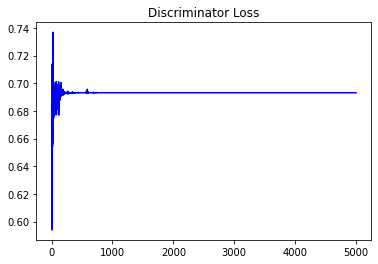

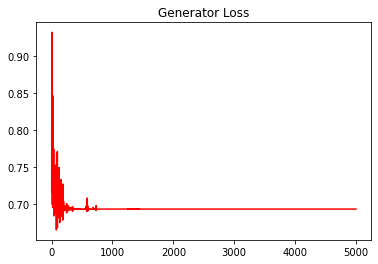

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

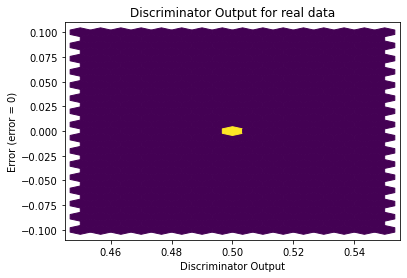

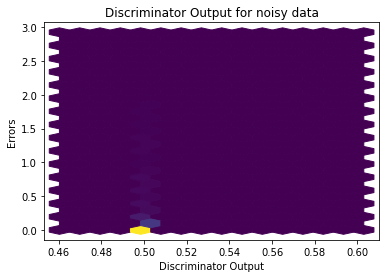

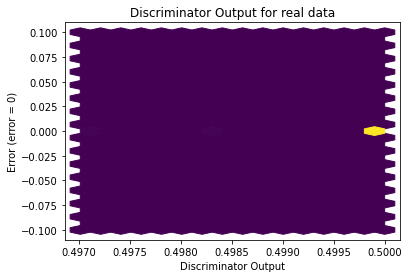

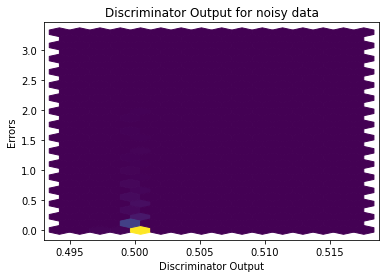

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


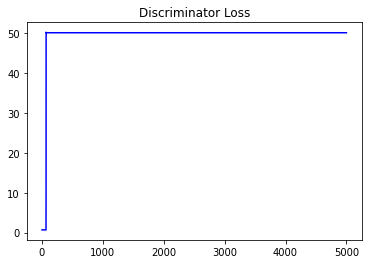

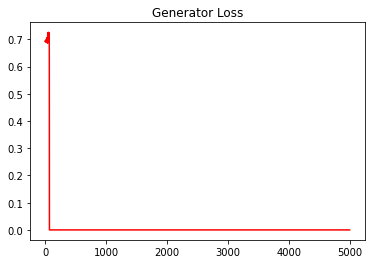

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

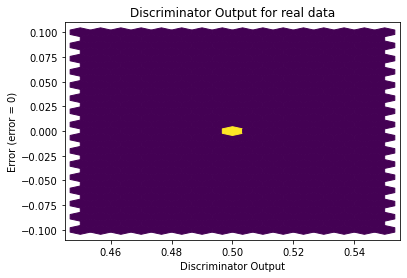

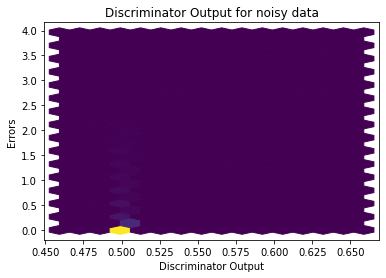

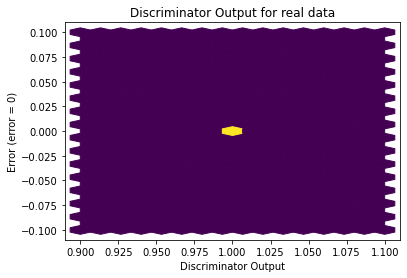

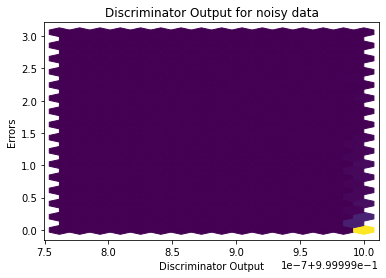

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1422]], device='cuda:0', requires_grad=True)
